# Welcome to WoMa

This notebook aims to cover the basic usages of WoMa. Let's get started!

In [1]:
import woma

R_earth = 6371000  # m
M_earth = 5.972E24 # kg m^-3 

/home/sergio/Documents/WoMa/eos/sesame.py:133: RuntimeWarning: divide by zero encountered in log
  return A2_u, A2_P, A2_s, np.log(A1_rho), np.log(A1_T), np.log(A2_u)
/home/sergio/Documents/WoMa/eos/hm80.py:76: RuntimeWarning: divide by zero encountered in log
  log_u_max, num_u, log_u_step, np.log(A2_P), np.log(A2_T))


### Contents:
1. Spherical planetray profiles
2. Particle placement for spherical planetary profiles
3. Spinning planetary profiles
4. Particle placement for spinning planetary profiles

 ## 1. Spherical planetary profiles

Let us start building a simple spherical 1 layer planet.

We need to specify the following for every single planet we want to build:
- Equation of state for every material: we choose Tillotson granite.
- Relation temperature-density for every material: we choose a power relation $T=K\rho^\alpha$ with $\alpha=0$ (i.e. isothermal).
- Two out of the following three: pressure $P_{\rm s}$, temperature $T_{\rm s}$, and density $\rho_{\rm s}$ at the surface of our planet. We choose $P_{\rm s}=10^5\, \rm Pa$, and $T_{\rm s}=1000\, \rm K$.

In [27]:
l1_test = woma.Planet(
    name            = "my_first_planet",
    A1_mat_layer    = ['Til_granite'],
    A1_T_rho_type   = ['power'],
    A1_T_rho_args   = [[None, 0.]],     #alphas, K will be automatically computed
    P_s             = 1e5,
    T_s             = 1000
    )

For spherical 1 layer planets we need to specify the total radius $R$ or the total mass $M$ of the planet.
We say our planet has $R=R_\oplus$, and a possible maximum mass of $2M_\oplus$. These can also be defined as input in the cell above.

In [28]:
l1_test.R     = R_earth
l1_test.M_max = 2*M_earth

We now select the appropiate method and the planet gets built.

In [29]:
l1_test.gen_prof_L1_fix_M_given_R()

Finding M given R...
Done!
Planet "my_first_planet": 
    M            = 4.779e+24 kg = 0.80018 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["Til_granite"] 
    mat_id       = [101] 
    R_layer      = [1] R_earth
    M_layer      = [0.80018] M_earth
    M_frac_layer = [1] M_total
    idx_layer    = [9999] 
    P_s          = 1e+05 Pa
    T_s          = 1000 K
    rho_s        = 2142 kg/m^3
    P_0          = 1.6021e+11 Pa
    T_0          = 1000 K
    rho_0        = 6744.8 kg/m^3
    I_MR2        = 0.35357 M_tot*R_tot^2


Let's plot the results.

In [30]:
import matplotlib.pyplot as plt

def plot_spherical_profile(planet):
    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))
    
    ax[0,0].plot(planet.A1_r/R_earth, planet.A1_rho)
    ax[0,0].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[0,0].set_ylabel(r"$\rho$ $[kg/m^3]$")
    ax[0,0].set_yscale("log")
    ax[0,0].set_xlim(0, None)
    
    ax[1,0].plot(planet.A1_r/R_earth, planet.A1_m_enc/M_earth)
    ax[1,0].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[1,0].set_ylabel(r"$M$ $[M_\oplus]$")
    ax[1,0].set_xlim(0, None)
    
    ax[0,1].plot(planet.A1_r/R_earth, planet.A1_P)
    ax[0,1].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[0,1].set_ylabel(r"$P$ $[Pa]$")
    ax[0,1].set_xlim(0, None)
    
    ax[1,1].plot(planet.A1_r/R_earth, planet.A1_T)
    ax[1,1].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[1,1].set_ylabel(r"$T$ $[K]$")
    ax[1,1].set_xlim(0, None)
    
    plt.tight_layout()
    plt.show()

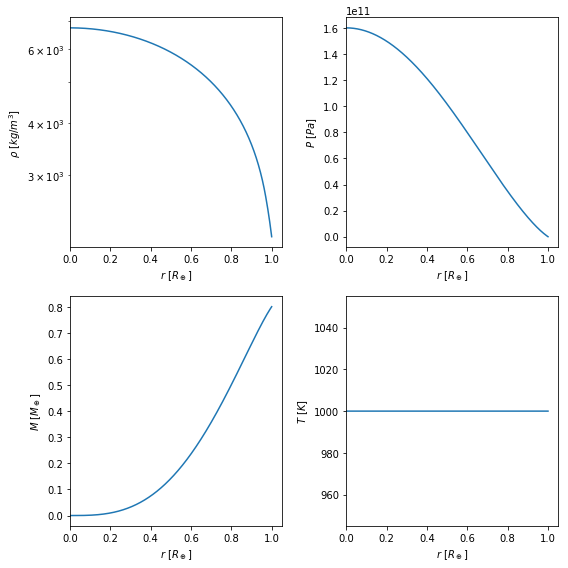

In [31]:
plot_spherical_profile(l1_test)

As mentioned before, for 1 layer planets we have two options:
- Fix the radius `R` and the maximum mass `M_max`, then the total mass is determined.
- Fix the mass `M` and the maximum radius `R_max`, then the total radius is determined.

Let us try the second option:

In [40]:
l1_test = woma.Planet(
    name            = "my_second_planet",
    A1_mat_layer    = ['Til_granite'],
    A1_T_rho_type   = ['power'],
    A1_T_rho_args   = [[None, 0.]],     # alphas
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    R_max           = 100*R_earth
    )

Finding R given M:  62%|██████▎   | 25/40 [00:01<00:01, 14.21it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "my_second_planet": 
    M            = 5.972e+24 kg = 0.99993 M_earth
    R            = 1.4802e+08 m = 23.234 R_earth
    mat          = ["HM80_HHe"] 
    mat_id       = [200] 
    R_layer      = [23.234] R_earth
    M_layer      = [0.99993] M_earth
    M_frac_layer = [1] M_total
    idx_layer    = [9999] 
    P_s          = 1e+05 Pa
    T_s          = 1000 K
    rho_s        = 0.28212 kg/m^3
    P_0          = 9.7081e+05 Pa
    T_0          = 1000 K
    rho_0        = 0.71444 kg/m^3
    I_MR2        = 0.35687 M_tot*R_tot^2


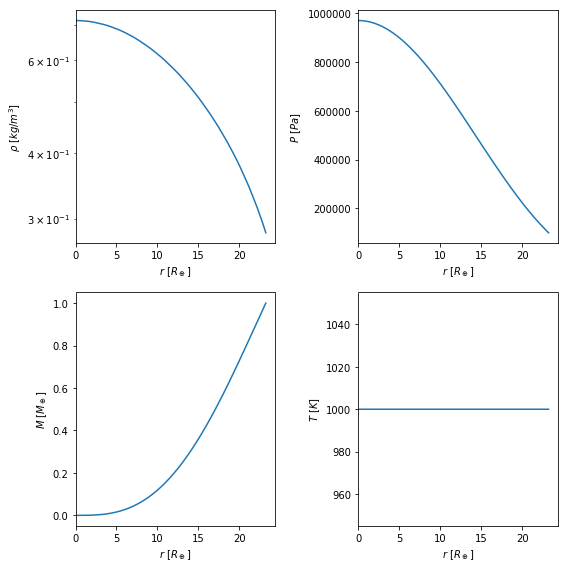

In [41]:
l1_test.gen_prof_L1_fix_R_given_M()
plot_spherical_profile(l1_test)

Let us continue with 2 layer planets. Let us choose a power relation temperature-density with $\alpha=0.5$ for our core, and $\alpha=1$ for our mantle.

In [9]:
l2_test = woma.Planet(
    A1_mat_layer    = ['Til_iron', 'Til_granite'],
    A1_T_rho_type   = ['power', 'power'],
    A1_T_rho_args   = [[None, 0.5], [None, 1]],     #alphas
    P_s             = 1e5,
    T_s             = 300
    )

In this case we have many more combinations to determine all the gloval variables of our planet as a function of a few. See `woma.py` for full details.

We can, for instance, determine the mass of every layer `A1_M_layer` and a maximum radius `R_max`, then the boundary and total radius are automatic.

Finding R1 and R given M1, M2: 100%|██████████| 40/40 [03:20<00:00,  4.98s/it]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.9714e+24 kg = 0.9999 M_earth
    R            = 6.2255e+06 m = 0.97717 R_earth
    mat          = ["Til_iron", "Til_granite"] 
    mat_id       = [100, 101] 
    R_layer      = [0.49371, 0.97717] R_earth
    M_layer      = [0.29992, 0.69997] M_earth
    M_frac_layer = [0.29996, 0.70004] M_total
    idx_layer    = [5052, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 300 K
    rho_s        = 2511.8 kg/m^3
    P_1          = 1.7795e+11 Pa
    T_1          = 833.37 K
    rho_1        = 12330 kg/m^3
    P_0          = 4.6593e+11 Pa
    T_0          = 940.89 K
    rho_0        = 15717 kg/m^3
    I_MR2        = 0.31628 M_tot*R_tot^2


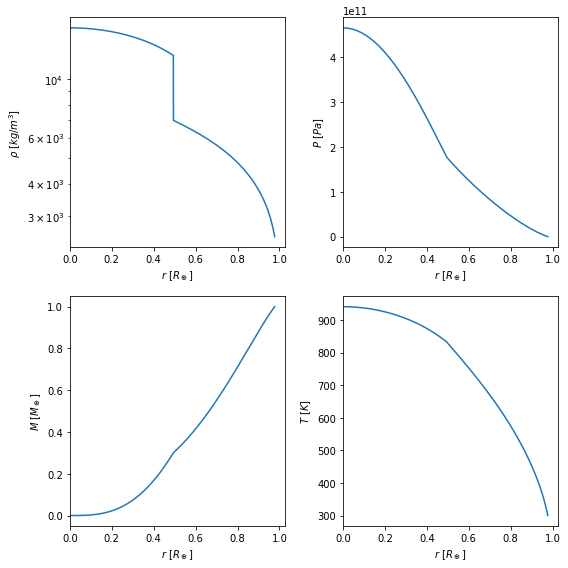

In [10]:
l2_test.A1_M_layer = [0.3*M_earth, 0.7*M_earth]
l2_test.R_max      = 2*R_earth

l2_test.gen_prof_L2_fix_R1_R_given_M1_M2()
plot_spherical_profile(l2_test)

Or, we could determine the total mass `M`, the radius `R`, and the boundary between materials gets automatically computed. Let us choose SESAME EoS for this example:

In [11]:
l2_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt'],
    A1_T_rho_type   = ['power', 'power'],
    A1_T_rho_args   = [[None, 0.5], [None, 1]],     #alphas
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [None, R_earth]               # list with boundary and total radius
    )

Finding R1 given R, M: 100%|██████████| 40/40 [00:31<00:00,  1.26it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.9712e+24 kg = 0.99987 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["SESAME_iron", "SESAME_basalt"] 
    mat_id       = [300, 301] 
    R_layer      = [0.53115, 1] R_earth
    M_layer      = [0.35681, 0.64305] M_earth
    M_frac_layer = [0.35686, 0.64314] M_total
    idx_layer    = [5311, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 300 K
    rho_s        = 2818.9 kg/m^3
    P_1          = 1.4399e+11 Pa
    T_1          = 594.66 K
    rho_1        = 11680 kg/m^3
    P_0          = 4.5023e+11 Pa
    T_0          = 676.99 K
    rho_0        = 15138 kg/m^3
    I_MR2        = 0.31211 M_tot*R_tot^2


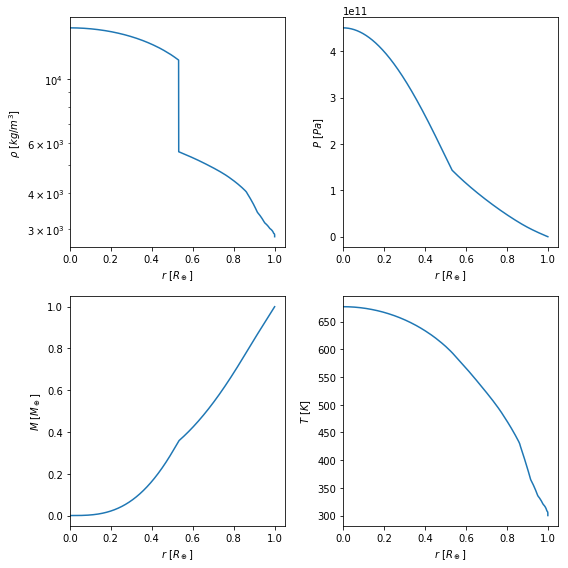

In [12]:
l2_test.gen_prof_L2_fix_R1_given_R_M()
plot_spherical_profile(l2_test)

Finally, we have 3 layer planets. In this example we determine the boundary mantle-atmosphere given the mass, radius, and boundary core-mantle

In [13]:
l3_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt', 'SS08_water'],
    A1_T_rho_type   = ['power', 'power', 'power'],
    A1_T_rho_args   = [[None, 0.5], [None, 1], [None, 1.5]],     #alphas
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [0.6*R_earth, None, R_earth]               # list with boundaries and total radius
    )

Finding R2 given M, R, R1: 100%|██████████| 40/40 [00:33<00:00,  1.23it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.9724e+24 kg = 1.0001 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["SESAME_iron", "SESAME_basalt", "SS08_water"] 
    mat_id       = [300, 301, 303] 
    R_layer      = [0.59996, 0.92379, 1] R_earth
    M_layer      = [0.5124, 0.43639, 0.051264] M_earth
    M_frac_layer = [0.51237, 0.43637, 0.051261] M_total
    idx_layer    = [5999, 9237, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 300 K
    rho_s        = 998.55 kg/m^3
    P_2          = 6.7725e+09 Pa
    T_2          = 579.61 K
    rho_2        = 3068.6 kg/m^3
    P_1          = 1.1758e+11 Pa
    T_1          = 1005.4 K
    rho_1        = 11175 kg/m^3
    P_0          = 5.1765e+11 Pa
    T_0          = 1190.3 K
    rho_0        = 15663 kg/m^3
    I_MR2        = 0.27729 M_tot*R_tot^2


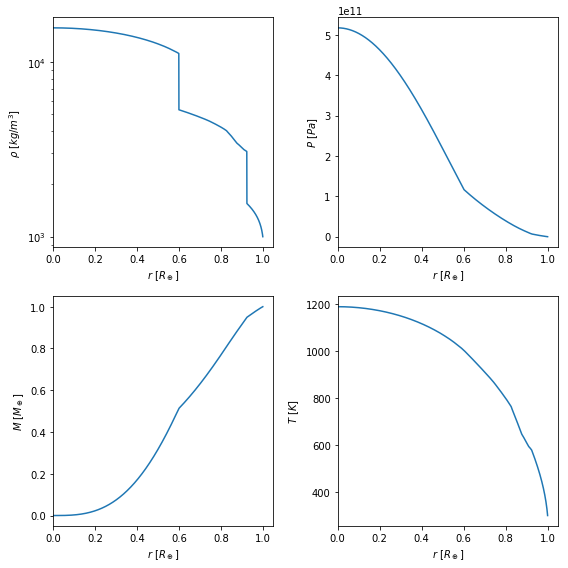

In [14]:
l3_test.gen_prof_L3_fix_R2_given_R_M_R1()
plot_spherical_profile(l3_test)

In this final example, we determine boundary core-mantle and boundary mantle-atmosphere given the radius, mass and moment of inertia.

In [15]:
l3_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt', 'SESAME_water'],
    A1_T_rho_type   = ['power', 'power', 'power'],
    A1_T_rho_args   = [[None, 0.], [None, 0.], [None, 0.]],     #alphas
    P_s             = 1,
    T_s             = 500,
    M               = M_earth,
    A1_R_layer      = [None, None, R_earth],               # list with boundaries and total radius
    I_MR2           = 0.3*M_earth*R_earth**2,
    num_attempt     = 5,                                   # Control internal number of iterations
    num_attempt_2   = 5
    )

Finding R1, R2 given R, M, I_MR2: 100%|██████████| 5/5 [00:31<00:00,  6.19s/it]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 6.1242e+24 kg = 1.0255 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["SESAME_iron", "SESAME_basalt", "SESAME_water"] 
    mat_id       = [300, 301, 302] 
    R_layer      = [0.56886, 0.9865, 1] R_earth
    M_layer      = [0.44237, 0.58297, 0.00014533] M_earth
    M_frac_layer = [0.43138, 0.56848, 0.00014172] M_total
    idx_layer    = [5688, 9864, 9999] 
    P_s          = 1 Pa
    T_s          = 500 K
    rho_s        = 2.9114e-06 kg/m^3
    P_2          = 1.8084e+07 Pa
    T_2          = 500 K
    rho_2        = 2845.4 kg/m^3
    P_1          = 1.3632e+11 Pa
    T_1          = 500 K
    rho_1        = 11568 kg/m^3
    P_0          = 4.9943e+11 Pa
    T_0          = 500 K
    rho_0        = 15561 kg/m^3
    I_MR2        = 0.29676 M_tot*R_tot^2


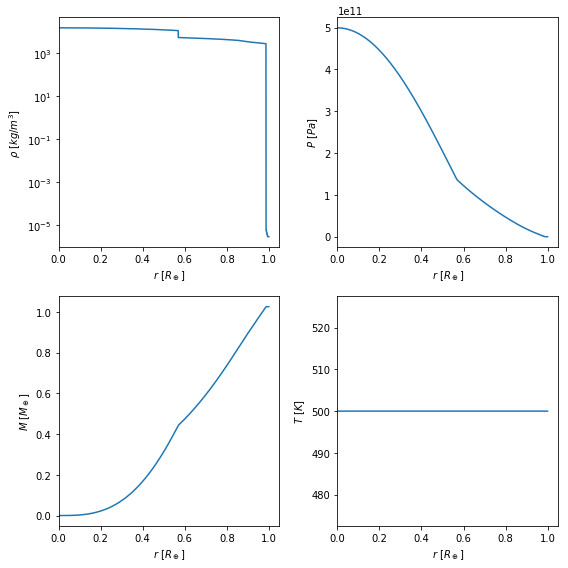

In [16]:
l3_test.gen_prof_L3_fix_R1_R2_given_R_M_I()
plot_spherical_profile(l3_test)

## 2. SPH particle placement for spherical profiles

We use the SEA algorithm ([Kegerreis et al. 2019](https://doi.org/10.1093/mnras/stz1606)) to place particles accordingly given a spherical profile.

We use a 2 layer planet generated by woma as an example:

In [17]:
import woma
import seagen

R_earth = 6371000
M_earth = 5.972E24

l2_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt'],
    A1_T_rho_type   = ['power', 'power'],
    A1_T_rho_args   = [[None, 0.5], [None, 1]],     #alphas
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [None, R_earth]               # list with boundary and total radius
    )

l2_test.gen_prof_L2_fix_R1_given_R_M()

Finding R1 given R, M: 100%|██████████| 40/40 [00:31<00:00,  1.21it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.9712e+24 kg = 0.99987 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["SESAME_iron", "SESAME_basalt"] 
    mat_id       = [300, 301] 
    R_layer      = [0.53115, 1] R_earth
    M_layer      = [0.35681, 0.64305] M_earth
    M_frac_layer = [0.35686, 0.64314] M_total
    idx_layer    = [5311, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 300 K
    rho_s        = 2818.9 kg/m^3
    P_1          = 1.4399e+11 Pa
    T_1          = 594.66 K
    rho_1        = 11680 kg/m^3
    P_0          = 4.5023e+11 Pa
    T_0          = 676.99 K
    rho_0        = 15138 kg/m^3
    I_MR2        = 0.31211 M_tot*R_tot^2


In [18]:
N         = 1e5 # Number of particles
particles = seagen.GenSphere(N, l2_test.A1_r[1:], l2_test.A1_rho[1:])

#  SEAGen 
#  https://github.com/jkeger/seagen 

Verbosity 1: Standard printing

> Interpolating profiles to increase radial density 
> Done interpolating profiles! 

1 layer(s):
    Outer radius   Mass          Material
    6.371000e+06   5.97005e+24   0

> Divide the profile into shells

> Tweak the particle mass to fix the outer boundary
> Done particle mass tweaking!

35 shells in layer 1

> Done profile division into shells!

==== Particles ====

> Find the values for the particles in each shell
  No extra values.
> Done shell particle values!

> Arrange the particles in each shell
    Shell 35 of 35
> Done particles!

Final number of particles = 108566

> SEAGen done!


## 3. Spinning planetary profiles

A spinning planetary profile can be described by its equatorial and polar density profiles. This is equivalent to say our planet is a set of constant density oblate spheroids. For full details see [Ruiz-Bonilla et al. 2020](fgdfgdfg).

The easiest way to construct a spheroidal planet in WoMa is starting from a spherical one. Let us construct an arbitrary one:

In [19]:
import woma
import seagen
import matplotlib.pyplot as plt
import numpy as np

R_earth = 6371000
M_earth = 5.972E24

l2_test = woma.Planet(
    A1_mat_layer    = ['Til_iron', 'Til_granite'],
    A1_T_rho_type   = ['power', 'power'],
    A1_T_rho_args   = [[None, 0.1], [None, 0.1]],     #alphas
    P_s             = 1e5,
    T_s             = 3000,
    M               = M_earth,
    A1_R_layer      = [0.5*R_earth, None],               # list with boundary and total radius
    R_max           = 2*R_earth
    )

l2_test.gen_prof_L2_fix_R_given_M_R1()

Finding R given M, R1: 100%|██████████| 40/40 [00:09<00:00,  3.88it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.972e+24 kg = 1 M_earth
    R            = 6.6643e+06 m = 1.046 R_earth
    mat          = ["Til_iron", "Til_granite"] 
    mat_id       = [100, 101] 
    R_layer      = [0.49995, 1.046] R_earth
    M_layer      = [0.2961, 0.7039] M_earth
    M_frac_layer = [0.2961, 0.7039] M_total
    idx_layer    = [4779, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 3000 K
    rho_s        = 1407.4 kg/m^3
    P_1          = 1.5912e+11 Pa
    T_1          = 3493.9 K
    rho_1        = 11608 kg/m^3
    P_0          = 4.282e+11 Pa
    T_0          = 3586.9 K
    rho_0        = 15095 kg/m^3
    I_MR2        = 0.29711 M_tot*R_tot^2


We now, just simply use the `SpinPlanet` class:

In [ ]:
import woma

my_planet = woma.Planet(
    A1_mat_layer    = ['Til_iron', 'Til_granite'],
    A1_T_rho_type   = ['power', 'power'],
    A1_T_rho_args   = [[None, 0.1], [None, 0.1]],       #alphas
    P_s             = 1e5,
    T_s             = 3000,
    M               = M_earth,
    A1_R_layer      = [0.5*R_earth, None],              # list with boundary and total radius
    R_max           = 2*R_earth
    )

my_planet.gen_prof_L2_fix_R_given_M_R1()

my_spinning_planet = woma.SpinPlanet(
    planet = my_planet,
    Tw     = 3
    )

my_spinning_planet.spin()

In [20]:
l2_test_spin = woma.SpinPlanet(
    planet = l2_test
    )

We can compute the shortest period by calling the `find_Tw_min()` method:

In [21]:
l2_test_spin.find_Tw_min()
print("Shortest period: %.3f hours" % (l2_test_spin.Tw_min))

Finding Tw min:: 100%|██████████| 20/20 [00:03<00:00,  9.45it/s]

Shortest period: 2.766 hours


Note the units of periods are set in hours, the rest of units are SI.

Let's compute the spinning planetary profile of the planet with such period:

In [22]:
l2_test_spin.Tw = l2_test_spin.Tw_min

# or 
# l2_test_spin = woma.SpinPlanet(
#     planet = l2_test,
#     Tw     = 2.765     # hours
#     )

l2_test_spin.spin()

Solving spining profile: 100%|██████████| 15/15 [00:03<00:00,  4.75it/s]



Done!
Planet "None": 
    M            = 7.6458e+24 kg = 1.2803 M_earth
    R_equator    = 8.2753e+06 m = 1.2989 R_earth
    R_pole       = 5.8838e+06 m = 0.92352 R_earth
    mat          = ["Til_iron", "Til_granite"] 
    mat_id       = [100, 101] 
    R_layer_eq   = [0.55914, 1.2989] R_earth
    R_layer_pole = [0.45485, 0.92352] R_earth
    M_layer      = [0.33676, 0.94351] M_earth
    M_frac_layer = [0.26304, 0.73696] M_total
    P_s          = 1e+05 Pa
    T_s          = 3002.9 K
    rho_s        = 1407.4 kg/m^3
    P_1          = 1.5912e+11 Pa
    T_1          = 3493.9 K
    rho_1        = 11608 kg/m^3
    P_0          = 4.282e+11 Pa
    T_0          = 3586.9 K
    rho_0        = 15095 kg/m^3


Let's plot the results:

In [23]:
def plot_spin_profile(spin_planet):
    
    sp = spin_planet
    
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].scatter(sp.A1_r/R_earth, sp.A1_rho, label = 'original', s = 0.5)
    ax[0].scatter(sp.A1_r_equator/R_earth, sp.A1_rho_equator, label = 'equatorial profile', s = 1)
    ax[0].scatter(sp.A1_r_pole/R_earth, sp.A1_rho_pole, label = 'polar profile', s = 1)
    ax[0].set_xlabel(r"$r$ [$R_{earth}$]")
    ax[0].set_ylabel(r"$\rho$ [$kg/m^3$]")
    ax[0].legend()
    
    
    r_array_coarse = np.linspace(0, np.max(sp.A1_r_equator), 200)
    z_array_coarse = np.linspace(0, np.max(sp.A1_r_pole), 200)
    rho_grid = np.zeros((r_array_coarse.shape[0], z_array_coarse.shape[0]))
    for i in range(rho_grid.shape[0]):
        radius = r_array_coarse[i]
        for j in range(rho_grid.shape[1]):
            z = z_array_coarse[j]
            rho_grid[i,j] = woma.us.rho_rz(radius, z,
                                      sp.A1_r_equator, sp.A1_rho_equator,
                                      sp.A1_r_pole, sp.A1_rho_pole)
    
    X, Y = np.meshgrid(r_array_coarse/R_earth, z_array_coarse/R_earth)
    Z = rho_grid.T
    levels = np.arange(1000, 15000, 1000)
    ax[1].set_aspect('equal')
    CS = plt.contour(X, Y, Z, levels = levels)
    ax[1].clabel(CS, inline=1, fontsize=10)
    ax[1].set_xlabel(r"$r$ [$R_{earth}$]")
    ax[1].set_ylabel(r"$z$ [$R_{earth}$]")
    ax[1].set_title('Density (Kg/m^3)')
        
    plt.tight_layout()
    plt.show()

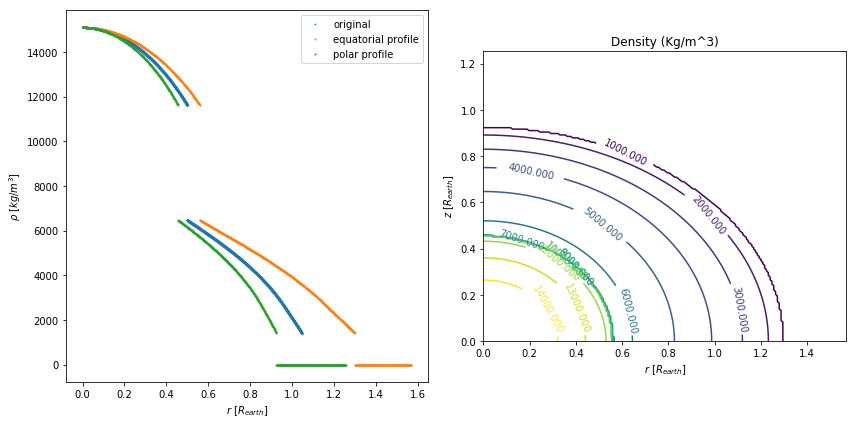

In [24]:
plot_spin_profile(l2_test_spin)

## 4. Particle placement for spinning planetary profiles

We place particles for the example used above (see [Ruiz-Bonilla et al. 2020](fgdfgdfg) for full details):

In [25]:
particles = woma.GenSpheroid(
    spin_planet = l2_test_spin,
    N_particles = 1e5)

#  SEAGen 
#  https://github.com/jkeger/seagen 



Creating shells...:   0%|          | 0/36 [00:00<?, ?it/s]


Untested stretching N = 4!


Creating shells...: 100%|██████████| 36/36 [00:01<00:00, 22.15it/s]
